Business Question 3 – Predictive Modelling of Heart Disease Risk

In [1]:
# ==== Business Question 3 Template ====
# Can we build a predictive model to identify individuals at higher risk of heart disease?
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 1. Load clinical dataset
heart_path = "Heart_R8_Cleaned.csv"
heart_df = pd.read_csv(heart_path)

In [3]:
# 2. Define features and target
# Adjust this list based on your actual columns
feature_cols = [
    "Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol",
    "FastingBS", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"
]
target_col = "HeartDisease"

X = heart_df[feature_cols].copy()
y = heart_df[target_col].copy()

In [4]:
# 3. Identify numeric and categorical columns
numeric_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_features = ["Sex", "ChestPainType", "FastingBS", "ExerciseAngina", "ST_Slope"]

In [5]:
# 4. Preprocessing: scale numeric if desired and one-hot encode categoricals
numeric_transformer = "passthrough"  # placeholder; can add StandardScaler() if needed
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [9]:
# 5. Train–test split
heart_df["HeartDisease"] = heart_df["HeartDisease"].map({"No": 0, "Yes": 1})

X = heart_df[feature_cols].copy()
y = heart_df["HeartDisease"].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.9021739130434783
Precision: 0.9038461538461539
Recall: 0.9215686274509803
F1 Score: 0.912621359223301


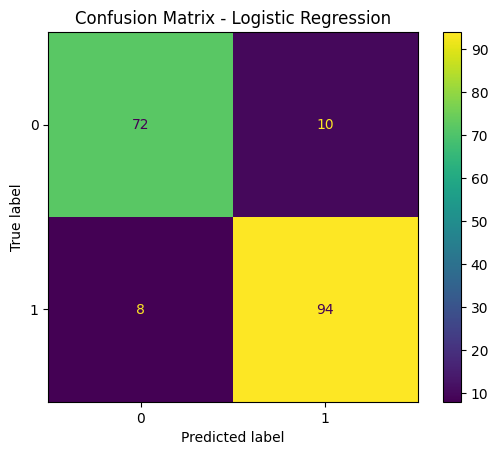

In [10]:
# 6a. Logistic Regression model pipeline
log_reg_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

log_reg_clf.fit(X_train, y_train)
y_pred_lr = log_reg_clf.predict(X_test)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


KNN Performance:
Accuracy: 0.6793478260869565
Precision: 0.7047619047619048
Recall: 0.7254901960784313
F1 Score: 0.714975845410628


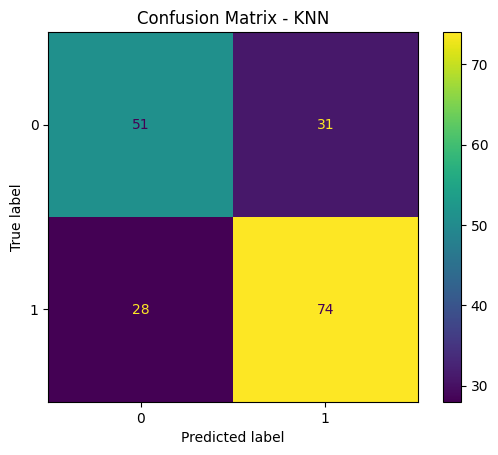

In [11]:
# 6b. K-Nearest Neighbours model pipeline
knn_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]
)

knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print("\nKNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("Confusion Matrix - KNN")
plt.show()


In [12]:
# 7. (Optional) Extract feature importance / coefficients for interpretability
# This requires accessing the trained logistic regression model inside the pipeline.
log_reg_model = log_reg_clf.named_steps["model"]
# To map coefficients back to feature names, you would need to inspect the preprocessed feature names
# using the preprocessor and OneHotEncoder; this can be added once the model is finalised.

### Model Performace Comparison Table


Metric	         Logistic Regression	  KNN (k=5)	                    Remark 	                                                      Which is better?
Accuracy	            0.9	                0.68	     Correct heart disease prediction rate	                                    Logistic Regression
Precision	            0.9	                0.7	         Making correct positive predictions	                                    Logistic Regression
Recall	                0.92	            0.72	     Catching actual heart disease cases	                                    Logistic Regression
F1-Score	            0.91	            0.71	     Balancing catching real heart disease cases and avoiding wrong predictions	Logistic Regression
True Positives (TP)	    94	                74	         Correct prediction of patients with heart disease	                        Logistic Regression
False Positives (FP)	10	                31	         Uncesssary/false alarm	                                                    Logistic Regression
True Negatives (TN)	    72	                51	         Correct prediction of patients without heart disease	                    Logistic Regression
False Negatives (FN)	8	                28	         Missed true heart disease cases	                                        Logistic Regression


### Interpretation, Conclusion & Recommendation Letter for Mayo Clinic

Based on our analysis of the clinical heart-disease dataset, we developed and compared two predictive models (Logistic Regression and K-Nearest Neighbours) to determine which approach provides the most reliable support for identifying patients at higher risk of heart disease. The Logistic Regression model showed strong performance, correctly identifying most patients with heart disease (94 true positives) and most without the condition (72 true negatives). It also produced very few errors, with only 8 missed cases (false negatives) and 10 incorrect alerts (false positives). This resulted in an overall accuracy of 90% and an F1-score of 0.91, demonstrating a strong balance between catching actual cases (recall) and making correct positive predictions (precision).

In contrast, the KNN model was less consistent and less dependable. It missed a much larger number of real heart-disease cases (28 false negatives) and incorrectly flagged many healthy patients (31 false positives). It correctly predicted heart disease only 68% of the time.
and an F1-score of 0.71 demonstrating a weaker balance between catching actual cases (recall) and making correct positive predictions (precision). KNN showed weaker predictive ability and higher risk of clinical misclassification.

Given these findings, we recommend using Logistic Regression as the primary model for early cardiovascular risk identification at Mayo Clinic. Its high accuracy, low misclassification rate, and clear interpretability make it a safer and more practical option for supporting physicians during patient consultations. This model can enhance preventive-care discussions, help prioritize early monitoring, and provide data-driven insights that align with the clinic’s commitment to improving patient education and community heart-health outcomes.
Overall, the analysis demonstrates that Logistic Regression is the more effective and trustworthy decision-support tool for the clinic’s needs.
